In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load the dataset
data = pd.read_csv('fraudTrain.csv')

# Display the first 5 rows
data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
# Basic Info about the dataset
print("Dataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nClass Distribution:\n", data['is_fraud'].value_counts())


Dataset Shape: (1296675, 23)

Data Types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

Missing Values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
firs

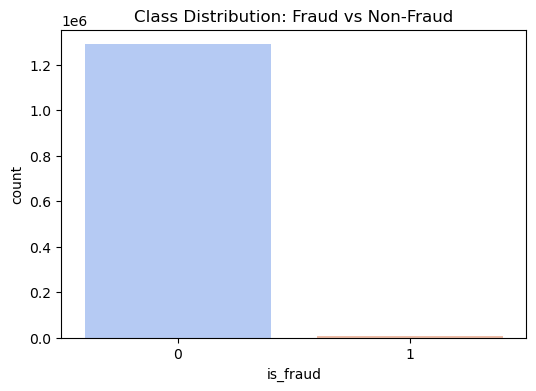

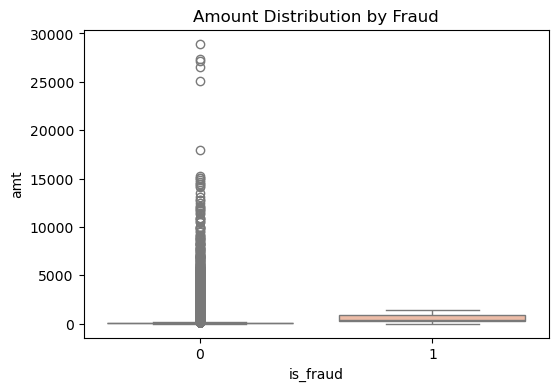

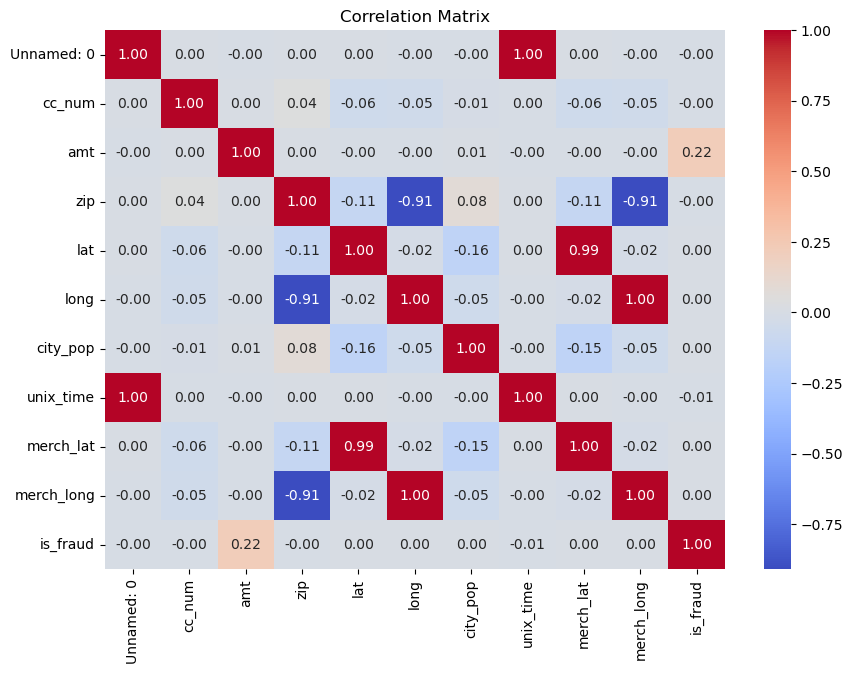

In [15]:
# Visualizations

# Class distribution: Fraud vs Non-Fraud
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=data, palette='coolwarm', hue='is_fraud', legend=False)
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.show()

# Boxplot for 'amt' distribution
plt.figure(figsize=(6,4))
sns.boxplot(x='is_fraud', y='amt', data=data, hue='is_fraud', palette='coolwarm', legend=False)
plt.title('Amount Distribution by Fraud')
plt.show()

# Correlation heatmap (only numeric columns)
plt.figure(figsize=(10,7))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = numeric_data.corr()  # Calculate correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Data Preprocessing and Feature Engineering

# 1. Handling Missing Values
# Check for missing values
print(data.isnull().sum())

# Fill missing values with mean 
data['amt'] = data['amt'].fillna(data['amt'].mean())
data['lat'] = data['lat'].fillna(data['lat'].mean())
data['long'] = data['long'].fillna(data['long'].mean())

# 2. Encoding Categorical Features
# Using Label(such as 'gender', 'merchant', etc.)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['category'] = label_encoder.fit_transform(data['category'])
data['merchant'] = label_encoder.fit_transform(data['merchant'])
data['job'] = label_encoder.fit_transform(data['job'])

# 3. Scaling Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['amt'] = scaler.fit_transform(data[['amt']])

# After preprocessing, let's check the first few rows of the dataset
print(data.head())


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
   Unnamed: 0 trans_date_trans_time            cc_num  merchant  category  \
0           0   2019-01-01 00:00:18  2703186189652095       514         8   
1           1   2019-01-01 00:00:44      630423337322       241         4   
2           2   2019-01-01 00:00:51    38859492057661       390         0   
3           3   2019-01-01 00:01:16  3534093764340240     

In [21]:
# model training using logistic regression

from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model with class weights
model = LogisticRegression(class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 85.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92    257815
           1       0.01      0.13      0.01      1520

    accuracy                           0.86    259335
   macro avg       0.50      0.50      0.47    259335
weighted avg       0.99      0.86      0.92    259335


Confusion Matrix:
[[222488  35327]
 [  1319    201]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [26]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 99.75%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.87      0.67      0.76      1520

    accuracy                           1.00    259335
   macro avg       0.93      0.83      0.88    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
[[257663    152]
 [   503   1017]]


In [34]:
import joblib
joblib.dump(rf_model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']